In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics

import seaborn as sns

In [2]:
base = pd.read_csv('../../Data/BaseData.csv')

In [3]:
X = base.drop(['SalePrice'], axis=1).values
y = base.SalePrice.values

In [4]:
len(y)

2580

In [5]:
X.shape

(2580, 298)

In [6]:
X.shape[1]

298

In [7]:
Scores = []
AdjR2 = []

Lasso_Alphas = []
alphas = 10**np.linspace(10,-2,100)*0.5


for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    lassocv= LassoCV(alphas=alphas, cv=2, max_iter=100000)
    lassocv.fit(X_train_scaled, Y_train)
    
    lasso_best_alpha = Lasso(alpha=round(lassocv.alpha_,2))
    lasso_best_alpha.fit(X_train_scaled, Y_train)
    Lasso_A_Score = lasso_best_alpha.score(X_test_scaled, Y_test)
    
    Scores.append(Lasso_A_Score)
    
    Adj_r2 = 1 - (1-Lasso_A_Score) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AdjR2.append(Adj_r2)
    
    Lasso_Alphas.append(lassocv.alpha_)

In [8]:
PositiveR2 = []
NegativeR2 = []

for i in Scores:
    if i < 0:
        NegativeR2.append(i)
    else:
        PositiveR2.append(i)

In [9]:
PositiveAR2 = []
NegativeAR2 = []

for i in AdjR2:
    if i < 0:
        NegativeAR2.append(i)
    else:
        PositiveAR2.append(i)

In [10]:
R2 = pd.DataFrame(PositiveR2, columns=['R_Squared'])
AR2 = pd.DataFrame(PositiveAR2, columns=['Adjusted_R2'])
R2vAR2 = pd.concat([R2, AR2], axis=1)

In [11]:
R2vAR2

,R_Squared,Adjusted_R2
0,0.924510,0.914648
1,0.871471,0.854680
2,0.873128,0.856553
3,0.872241,0.855550
4,0.910819,0.899168
...,...,...
95,0.926064,0.916404
96,0.918953,0.908364
97,0.921177,0.910879
98,0.924578,0.914724


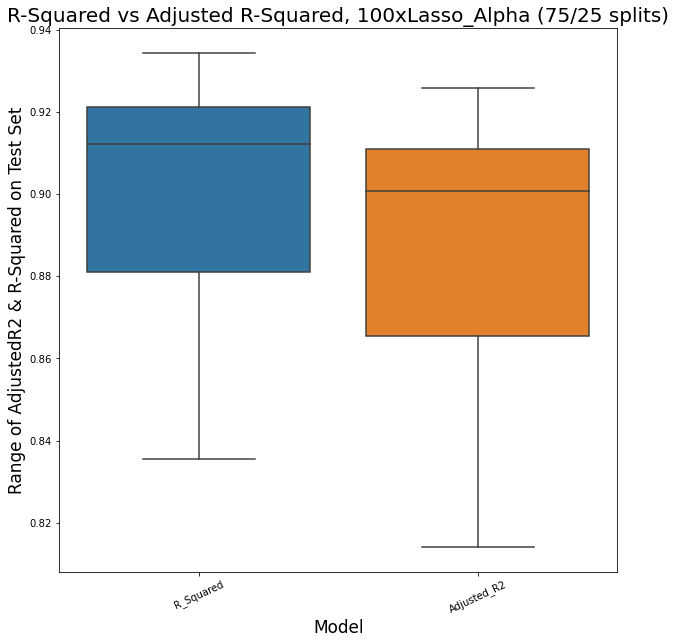

In [12]:
plt.figure(figsize=(10,10))
plt.title('R-Squared vs Adjusted R-Squared, 100xLasso_Alpha (75/25 splits)', fontsize=20)
plt.ylabel('Range of AdjustedR2 & R-Squared on Test Set', fontsize=17)
plt.xlabel('Model', fontsize=17)
sns.boxplot(data=R2vAR2)
plt.xticks(rotation=25);

Median Alpha is: 352.74011553593226
Mean Alpha is: 370.60631776035177
Standard Deviation Alpha is: 110.00423013677693


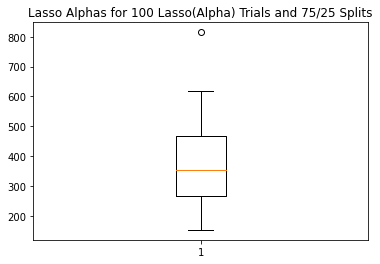

In [13]:
plt.boxplot(Lasso_Alphas)
plt.title('Lasso Alphas for 100 Lasso(Alpha) Trials and 75/25 Splits')
print("Median Alpha is: " + str(statistics.median(Lasso_Alphas)))
print("Mean Alpha is: " + str(statistics.mean(Lasso_Alphas)))
print("Standard Deviation Alpha is: " + str(statistics.stdev(Lasso_Alphas)))

In [14]:
print("Number of times results produced Negative R2: " + str((len(NegativeR2))))
print("Number of times results produced Negative Adjusted R2: " + str((len(NegativeAR2))))

Number of times results produced Negative R2: 0
Number of times results produced Negative Adjusted R2: 0


In [15]:
#df = pd.DataFrame(Positive, columns=['Lasso(Alpha)'])
R2vAR2.to_csv('Lasso(Alpha)_R2vAR2.csv', index=False)

In [16]:
R2vAR2['Difference'] = R2vAR2['R_Squared'] - R2vAR2['Adjusted_R2']

In [17]:
R2vAR2

,R_Squared,Adjusted_R2,Difference
0,0.924510,0.914648,0.009862
1,0.871471,0.854680,0.016792
2,0.873128,0.856553,0.016575
3,0.872241,0.855550,0.016691
4,0.910819,0.899168,0.011651
...,...,...,...
95,0.926064,0.916404,0.009659
96,0.918953,0.908364,0.010588
97,0.921177,0.910879,0.010298
98,0.924578,0.914724,0.009853


In [18]:
R2vAR2.Difference.mean()

0.012546304350234601

In [19]:
R2vAR2.describe()

,R_Squared,Adjusted_R2,Difference
count,100.000000,100.000000,100.000000
mean,0.903966,0.891420,0.012546
std,0.022912,0.025906,0.002993
min,0.835590,0.814110,0.008572
25%,0.880971,0.865421,0.010288
50%,0.912106,0.900624,0.011483
75%,0.921249,0.910960,0.015550
max,0.934389,0.925817,0.021479
